### Positional Metrics and Stereotype-Breaking in Football:
A brief study analyzing player performance based on their positions in football, concluding with clustering data into respective roles. The study highlights stereotype-breaking trends such as:
- Defenders with high attacking contributions
- Attackers with strong defensive performance  

Additionally, a radar chart will be presented to compare the profiles of Forwards and Midfielders.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../datasets/players_data-2024_2025.csv')

In [3]:
# Assuming players can have multiple roles
cross_pos_players = df[df['Pos'].str.contains('DF') & df['Pos'].str.contains('MF')]

display(cross_pos_players[['Player', 'Pos', 'Gls', 'Ast', 'Tkl', 'PrgR']])


,Player,Pos,Gls,Ast,Tkl,PrgR
1,Max Aarons,"DF,MF",0,0,3.0,8.0
3,James Abankwah,"DF,MF",0,0,4.0,1.0
8,Ali Abdi,"DF,MF",3,2,34.0,75.0
48,Ruben Aguilar,"DF,MF",1,1,31.0,73.0
69,Jean-Daniel Akpa-Akpro,"MF,DF",0,0,15.0,3.0
...,...,...,...,...,...,...
2696,Caleb Wiley,"DF,MF",0,1,1.0,9.0
2733,Eloge Zabi,"DF,MF",0,0,0.0,1.0
2735,Dan-Axel Zagadou,"DF,MF",0,0,0.0,0.0
2738,Warren Zaïre-Emery,"MF,DF",1,1,43.0,79.0


In [4]:
metrics = [
    'Gls', 'Ast', 'xA', 'KP', 'PPA', 'Tkl', 'Int', 'Tkl+Int', 'Clr', 
    'Blocks', 'PrgR', 'Touches', 'Carries', 'Dis', 'Mis'
]

# Group by position and calculate the mean
positional_avg = df.groupby('Pos')[metrics].mean().round(2)
positional_avg.T.style.background_gradient(cmap='viridis')

Pos,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW"
Gls,0.490000,0.920000,0.770000,3.870000,1.040000,2.580000,0.000000,1.040000,1.090000,1.870000
Ast,0.630000,1.100000,0.990000,1.420000,0.630000,1.650000,0.070000,0.980000,1.500000,1.380000
xA,0.720000,1.300000,1.180000,1.080000,0.610000,1.550000,0.030000,1.090000,1.300000,1.360000
KP,6.540000,11.670000,9.940000,11.190000,6.330000,14.130000,0.440000,11.260000,11.620000,13.640000
PPA,6.450000,12.000000,9.610000,7.630000,5.780000,11.920000,0.350000,8.690000,10.290000,11.190000
Tkl,22.220000,18.290000,20.720000,8.000000,9.630000,12.300000,0.430000,23.020000,24.000000,15.430000
Int,13.630000,7.230000,10.610000,2.590000,3.700000,3.810000,0.120000,10.630000,12.000000,5.510000
Tkl+Int,35.850000,25.520000,31.330000,10.590000,13.330000,16.110000,0.550000,33.650000,36.000000,20.940000
Clr,50.240000,23.770000,30.880000,7.770000,7.560000,7.470000,8.140000,16.300000,21.850000,7.770000
Blocks,9.130000,13.500000,11.510000,8.240000,7.070000,11.340000,0.350000,8.930000,11.920000,10.390000


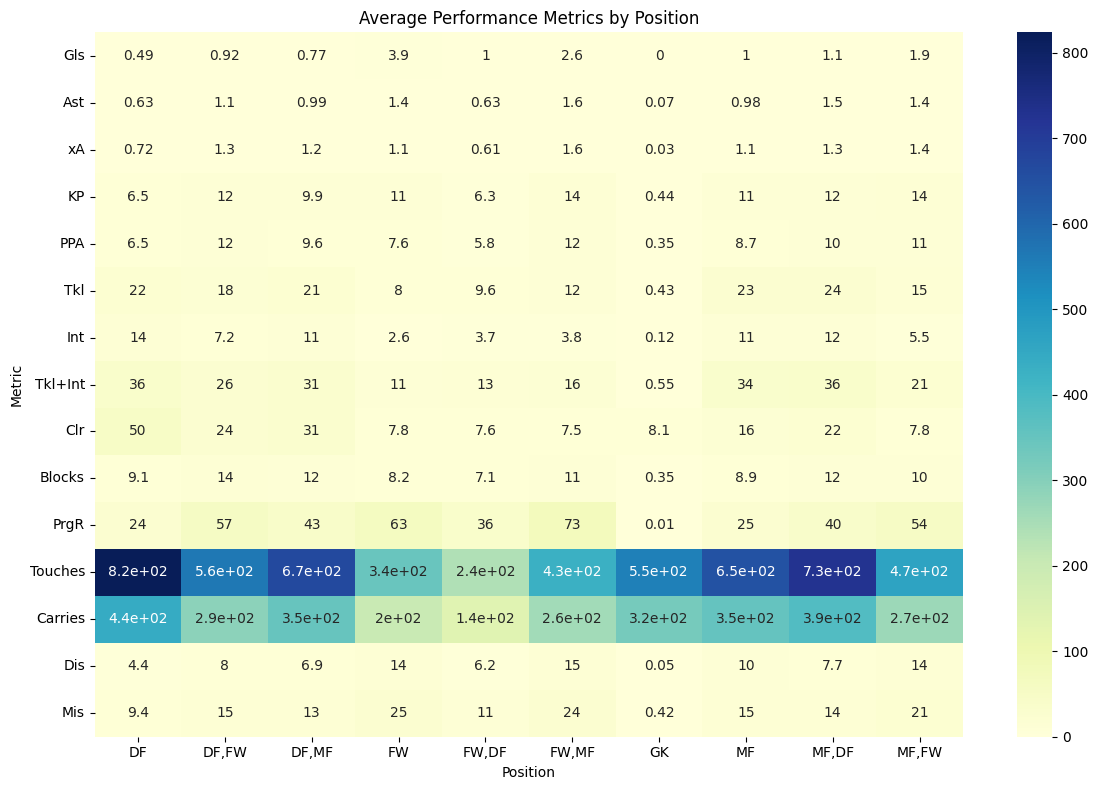

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(positional_avg.T, cmap="YlGnBu", annot=True)
plt.title("Average Performance Metrics by Position")
plt.xlabel("Position")
plt.ylabel("Metric")
plt.tight_layout()
plt.show()


In [6]:
# Define stereotype-breaking thresholds 
# e.g., defenders with unusually high progressive carries or key passes
defenders_outliers = df[(df['Pos'].str.contains('DF')) & ((df['PrgR'] > df['PrgR'].quantile(0.75)) | (df['KP'] > df['KP'].quantile(0.75)))]
attackers_outliers = df[(df['Pos'].str.contains('FW')) & ((df['Int'] > df['Int'].quantile(0.75)) | (df['Tkl'] > df['Tkl'].quantile(0.75)))]

print("🔁 Defenders who break the mold (High KP or PrgR):")
display(defenders_outliers[['Player', 'Pos', 'KP', 'PrgR']].sort_values(by='PrgR', ascending=False))

print("\n🛡️ Attackers with high defensive stats (Tkl or Int):")
display(attackers_outliers[['Player', 'Pos', 'Tkl', 'Int']].sort_values(by='Int', ascending=False))


🔁 Defenders who break the mold (High KP or PrgR):


,Player,Pos,KP,PrgR
2166,Antonee Robinson,DF,40.0,238.0
1093,Achraf Hakimi,DF,47.0,238.0
1118,Luis Henrique,"DF,FW",48.0,238.0
919,Jeremie Frimpong,"DF,MF",25.0,230.0
212,Alejandro Balde,DF,26.0,226.0
...,...,...,...,...
1513,Charalambos Lykogiannis,DF,16.0,25.0
2327,Nicolas Seiwald,"MF,DF",16.0,21.0
2196,Pablo Rosario,"MF,DF",15.0,18.0
2313,Nico Schlotterbeck,DF,18.0,14.0



🛡️ Attackers with high defensive stats (Tkl or Int):


,Player,Pos,Tkl,Int
944,Álvaro García,"FW,MF",30.0,28
331,Tom Bischof,"MF,FW",86.0,27
748,Nicolás Domínguez,"MF,FW",69.0,25
2704,Patrick Wimmer,"MF,FW",33.0,25
439,Mahdi Camara,"MF,FW",66.0,25
...,...,...,...,...
1387,Mohammed Kudus,"FW,MF",31.0,4
2305,Kevin Schade,FW,30.0,4
492,Josué Casimir,"FW,MF",30.0,4
2101,Christian Pulisic,"FW,MF",33.0,3


## Radar chart for Forwards players

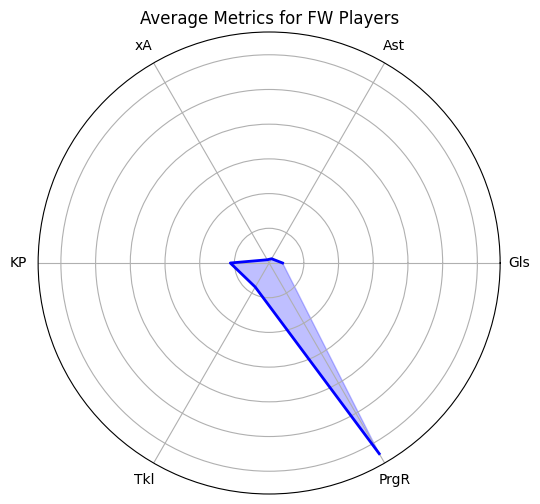

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

position = 'FW'  

df[['Gls', 'Ast', 'xA', 'KP', 'Tkl', 'PrgR']] = df[['Gls', 'Ast', 'xA', 'KP', 'Tkl', 'PrgR']].apply(pd.to_numeric, errors='coerce')


filtered_data = df[df['Pos'] == position][['Gls', 'Ast', 'xA', 'KP', 'Tkl', 'PrgR']]

player_data = filtered_data.mean()

labels = player_data.index
values = player_data.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
# Raddar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)
plt.title(f"Average Metrics for {position} Players")
plt.show()


### Radar chart for Midfielders players

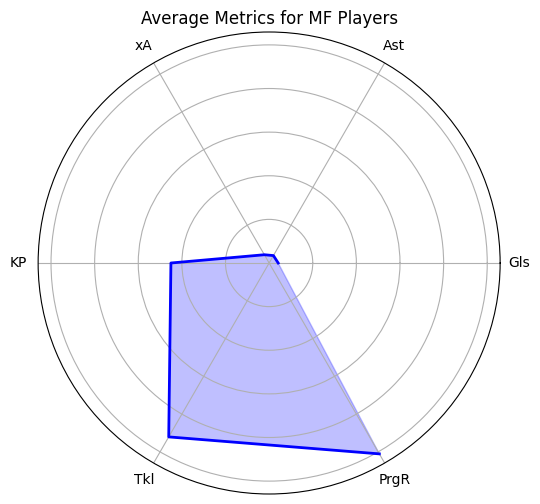

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

position = 'MF'  

df[['Gls', 'Ast', 'xA', 'KP', 'Tkl', 'PrgR']] = df[['Gls', 'Ast', 'xA', 'KP', 'Tkl', 'PrgR']].apply(pd.to_numeric, errors='coerce')


filtered_data = df[df['Pos'] == position][['Gls', 'Ast', 'xA', 'KP', 'Tkl', 'PrgR']]

player_data = filtered_data.mean()

labels = player_data.index
values = player_data.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
# Raddar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)
plt.title(f"Average Metrics for {position} Players")
plt.show()


## Z-score Method

In [13]:

from scipy.stats import zscore

# Focus on Forwards
fw_df = df[df["Pos"] == "FW"].copy()

# Only keep relevant stats
fw_df = fw_df[['Player', 'Gls', 'xG', 'Min']].dropna()

# Add a new metric: Goals minus expected goals
fw_df['G_minus_xG'] = fw_df['Gls'] - fw_df['xG']

# Z-score of that metric
fw_df['z_score'] = zscore(fw_df['G_minus_xG'])

# Define anomalies
fw_df['anomaly'] = fw_df['z_score'].apply(
    lambda z: 'Overperformer' if z > 2 else ('Underperformer' if z < -2 else 'Normal')
)

# Show anomalies
anomalies = fw_df[fw_df['anomaly'] != 'Normal'].sort_values(by='z_score', ascending=False)
print(anomalies[['Player', 'Gls', 'xG', 'G_minus_xG', 'z_score', 'anomaly']])


                 Player  Gls    xG  G_minus_xG   z_score         anomaly
2145      Mateo Retegui   22  14.4         7.6  4.634833   Overperformer
2716         Chris Wood   18  11.0         7.0  4.267891   Overperformer
2308      Patrik Schick   17  10.4         6.6  4.023262   Overperformer
1594      Omar Marmoush   15   8.8         6.2  3.778634   Overperformer
683     Ousmane Dembélé   21  14.9         6.1  3.717477   Overperformer
1654       Bryan Mbeumo   16  10.0         6.0  3.656320   Overperformer
1287         Harry Kane   23  17.9         5.1  3.105906   Overperformer
2243      Mohamed Salah   27  22.5         4.5  2.738964   Overperformer
2524      Marcus Thuram   14   9.8         4.2  2.555492   Overperformer
1191     Alexander Isak   20  16.1         3.9  2.372021   Overperformer
1323               Kiké   11   7.3         3.7  2.249707   Overperformer
817          Elif Elmas    4   0.7         3.3  2.005079   Overperformer
1945  Riccardo Orsolini   11   7.7         3.3  2.0

## Isolation Forest (unsupervised ML)

In [14]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Select features for forwards
features = ['Gls', 'xG', 'Ast', 'xAG', 'PrgC', 'KP']
fw_df = df[df['Pos'] == 'FW'].dropna(subset=features).copy()

X = fw_df[features]

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
fw_df['anomaly_score'] = iso.fit_predict(X)

# -1 = anomaly, 1 = normal
fw_df['anomaly_label'] = fw_df['anomaly_score'].map({-1: 'Anomaly', 1: 'Normal'})

# Show anomalies
print(fw_df[fw_df['anomaly_label'] == 'Anomaly'][['Player', 'Gls', 'xG', 'Ast', 'anomaly_label']])


                  Player  Gls    xG  Ast anomaly_label
235      Bradley Barcola   13  12.2    9       Anomaly
683      Ousmane Dembélé   21  14.9    5       Anomaly
777       Marvin Ducksch    7   8.5    7       Anomaly
807         Hugo Ekitike   13  18.5    4       Anomaly
1083      Erling Haaland   21  20.8    3       Anomaly
1133       Son Heung-min    7   7.0    9       Anomaly
1159  Callum Hudson-Odoi    5   2.4    2       Anomaly
1191      Alexander Isak   20  16.1    5       Anomaly
1199           Junya Ito    4   4.5    3       Anomaly
1260     Vinicius Júnior   11   9.6    5       Anomaly
1287          Harry Kane   23  17.9    8       Anomaly
1428         Rafael Leão    6   6.4    7       Anomaly
1449  Robert Lewandowski   25  24.0    2       Anomaly
1594       Omar Marmoush   15   8.8    9       Anomaly
1652       Kylian Mbappé   22  19.9    3       Anomaly
1654        Bryan Mbeumo   16  10.0    5       Anomaly
1787        Jacob Murphy    5   3.9    9       Anomaly
2243      

## Player Clusters Based on Position

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cluster_metrics = ['Gls', 'Ast', 'xA', 'KP', 'Tkl', 'Int', 'PrgR', 'Touches', 'Carries']
df_cleaned = df.dropna(subset=cluster_metrics)
X = df_cleaned[cluster_metrics]
# Apply PCA for dimensionality reduction to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5516\735673911.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(X)


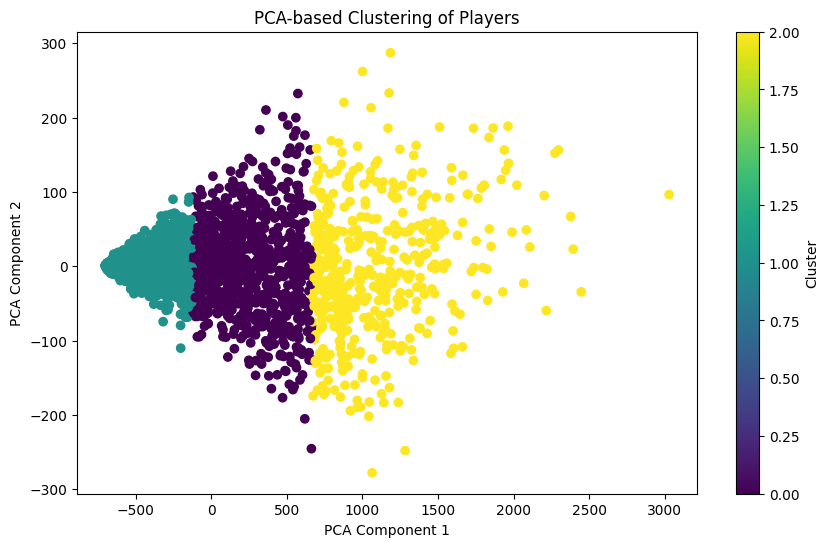

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.title("PCA-based Clustering of Players")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [11]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, df_cleaned['Cluster'])
print(f"Silhouette Score: {score}")


Silhouette Score: 0.5799975612510221
